In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from datascience import *

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# K-means and NBA Data, Part II

This dataset contains player statistics for the 2016 NBA season. Try k-means clustering on *subsets* of the columns in the dataset. Start with trying to answer the same questions as above. If you'd like, see if you can interpret the clusters when you increase the number of clusters.

**Warning**: Don't use scatter_matrix with more than ~5 columns -- it requires a lot of memory to plot.

The columns of this dataset are:

```
Rk        Player-id
Player    Player Name
Pos       Position
Age       Player Age
Tm        Team
G         Number of Games played
GS        Number of Games started
MP        Minutes played
FG        Field Goals
FGA       Field Goals Attempted
3P        Three-point shots made
3PA       Three-point shots attempted
2P        Two-point shots made
2PA       Two-point shots attempted
FT        Free Throws made
FTA       Free Throws attempted
ORB       Offensive rebounds
DRB       Defensive rebounds
TRB       Total rebounds
AST       Number of assists
STL       Number of steals
BLK       Number of blocks
TOV       Number of turnovers
PF        Number of personal fouls
PTS       Total number of points
```

In [3]:
nba = Table.read_table('data/nba2016.csv')
nba

Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Quincy Acy,PF,25,SAC,59,29,876,119,214,19,49,100,165,50,68,65,123,188,27,29,24,27,103,307
2,Jordan Adams,SG,21,MEM,2,0,15,2,6,0,1,2,5,3,5,0,2,2,3,3,0,2,2,7
3,Steven Adams,C,22,OKC,80,80,2014,261,426,0,0,261,426,114,196,219,314,533,62,42,89,84,223,636
4,Arron Afflalo,SG,30,NYK,71,57,2371,354,799,91,238,263,561,110,131,23,243,266,144,25,10,82,142,909
5,Alexis Ajinca,C,27,NOP,59,17,861,150,315,0,1,150,314,52,62,75,194,269,31,19,36,54,134,352
6,Cole Aldrich,C,27,LAC,60,5,800,134,225,0,0,134,225,60,84,86,202,288,50,47,68,64,139,328
7,LaMarcus Aldridge,PF,30,SAS,74,74,2261,536,1045,0,16,536,1029,259,302,176,456,632,110,38,81,99,151,1331
8,Cliff Alexander,PF,20,POR,8,0,36,5,10,0,0,5,10,0,0,2,4,6,0,1,2,1,1,10
9,Lavoy Allen,PF,26,IND,79,28,1599,191,370,0,0,191,370,46,73,162,262,424,76,26,42,69,147,428
10,Tony Allen,SG,34,MEM,64,57,1620,215,469,15,42,200,427,90,138,104,192,296,70,110,18,78,175,535


## Naive clustering

Try clustering without any scaling.

### A data-driven approach to answering "how many clusters are there?"
* Try kmeans clustering with 1,2,3,...,10 clusters.
* For each clustering attempt, measure how well it's clustered.
* Use the smallest number of clusters that give the most clustering accuracy.

In [4]:
def cluster_scores(data_arr):
    '''
    input a numpy nd.array of data
    returns cluster quality scores of using 1,2,..,9 clusters
    '''
    scores = []
    for i in np.arange(1, 10):
        score = KMeans(n_clusters=i).fit(data_arr).score(data_arr)
        scores.append(score)
    return scores

In [17]:
clustering_features = nba.drop('Rk', 'Player', 'Pos', 'Tm')

scores = cluster_scores(clustering_features.values)
scores


[-740843067.3615916,
 -231436138.0075665,
 -134417155.9252696,
 -96387842.33663236,
 -77934210.06976345,
 -66275860.17310701,
 -59558754.57852961,
 -54334751.977432474,
 -50446597.601475894]

### Plot the quality of the different clustering attempts
* Look for the "elbow" in the plot, when increaseing the number of clusters no longer gives you better clusters.

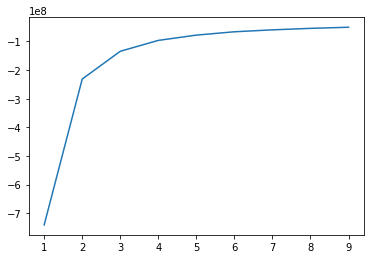

In [18]:
plt.plot(np.arange(1, 10), scores);

First, let's try using 2 clusters:

In [25]:
# the attribute .values accesses the underlying numpy
# array of a Table, which sklearn requires.
train = nba.drop('Rk', 'Player', 'Pos', 'Tm').values

kmeans2 = KMeans(n_clusters=2)
labels2 = kmeans2.fit_predict(train)
out2 = nba.with_column('label', labels2) # add labels to our input table

578

What do the clusters look like?
* Group by label and look at the sizes of the clusters
* Group by label and look at the average values of the clusters

In [26]:
out2.group('label')

label,count
0,356
1,222


In [27]:
out2.group('label', np.mean)

label,Rk mean,Player mean,Pos mean,Age mean,Tm mean,G mean,GS mean,MP mean,FG mean,FGA mean,3P mean,3PA mean,2P mean,2PA mean,FT mean,FTA mean,ORB mean,DRB mean,TRB mean,AST mean,STL mean,BLK mean,TOV mean,PF mean,PTS mean
0,248.52,,,27.0983,,34.2584,6.24157,522.146,69.9073,160.809,16.5618,49.1545,53.3455,111.654,29.5871,40.3848,21.5056,67.4972,89.0028,43.6067,16.0674,10.0169,27.8989,50.7388,185.963
1,229.923,,,26.3829,,73.0631,48.7973,2039.17,339.279,744.306,74.9054,208.964,264.374,535.342,160.658,210.234,87.3919,284.324,371.716,196.64,67.2568,41.5631,119.351,159.923,914.122


The main differentiators seem to come from minutes played:
* Most other statistics are correlated with minutes played! So MP explains the clusters well by itself!

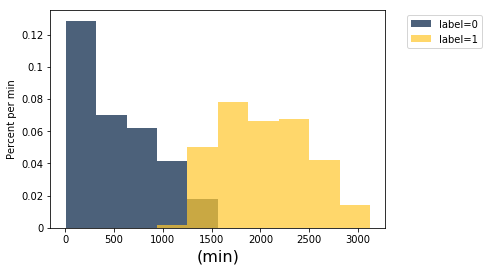

In [28]:
out2.hist('MP', group='label', unit='min')

Now, let's try 3 clusters!

In [29]:
train = nba.drop('Rk', 'Player', 'Pos', 'Tm').values

kmeans3 = KMeans(n_clusters=3)
labels3 = kmeans3.fit_predict(train)
out3 = nba.with_column('label', labels3) # add labels to our input table

What do the clusters represent?

In [30]:
out3.group('label')

label,count
0,178
1,286
2,114


In [31]:
out3.group('label', np.mean)

label,Rk mean,Player mean,Pos mean,Age mean,Tm mean,G mean,GS mean,MP mean,FG mean,FGA mean,3P mean,3PA mean,2P mean,2PA mean,FT mean,FTA mean,ORB mean,DRB mean,TRB mean,AST mean,STL mean,BLK mean,TOV mean,PF mean,PTS mean
0,232,,,26.8764,,66.8483,25.5506,1470.57,208.079,463.556,48.4213,138.169,159.657,325.388,86.0787,117.41,65.7472,198.596,264.343,118.326,45.8989,29.6685,75.6854,133.185,550.657
1,247.717,,,26.8671,,27.6713,4.0979,369.497,48.3881,111.601,11.1958,33.7552,37.1923,77.8462,20.5804,28.7378,16.028,48.1643,64.1923,30.6888,11.1958,7.52448,20.0699,36.6608,128.552
2,240.114,,,26.6316,,75.4649,64.3421,2378.44,432.719,947.833,93.8947,260.009,338.825,687.825,219.219,280.096,94.4737,333.544,428.018,257.36,81.3947,47.0175,151.018,169.947,1178.55


The main differentiator still seems to be minutes played (`MP`), which isn't a surprise.
* The three groups consist of "small/medium/large" number of minutes played.
* There's a better description, though. The three clusters can be described as:
    - Starters
    - Second Unit
    - Players with inconsistent playing time

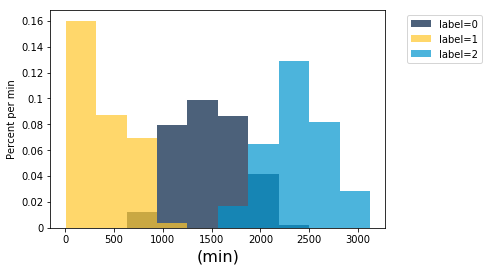

In [33]:
out3.hist('MP', group='label', unit='min')

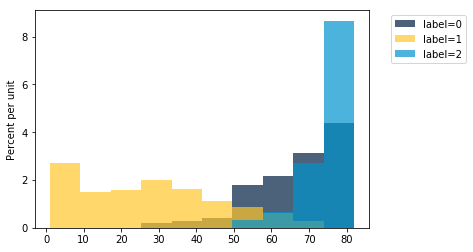

In [34]:
out3.hist('G', group='label')

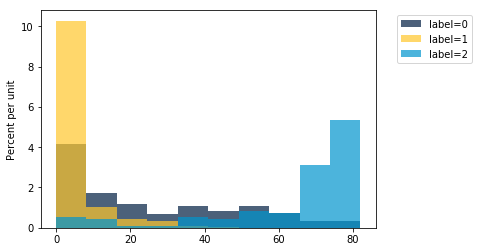

In [35]:
out3.hist('GS', group='label')

### Can we try to recover player positions from clusters?

In [36]:
nba.group('Pos').sort('count', descending=True)

Pos,count
PG,129
PF,122
SG,116
SF,105
C,104
SG-SF,1
PF-C,1


### Strategy for clustering players into positions played:
* Make the dataset reflect the differences in how positions play

To Start:
* De-correlate player statistics from minutes played.
* Drop `G`, `GS`, and `MP` -- since these don't have to do with your position!
* Also try: scale the dataset appropriately (`StandardScaler`?).

In [43]:
nba.column(label)

array([ 307,    7,  636,  909,  352,  328, 1331,   10,  428,  535,  839,
         52,  105,   13,   92,   65,  179,  208,  350, 1124, 1350,    6,
       1573,   18,    6, 1025,  527,  269,  467,  142,  325,   30,  327,
         34,  433,  808,  304,  774,  758, 1178,  473, 1046,  541,  514,
        872,  958,  255,  696,   28,  700,  454,  308,  133,   61,  254,
        632,  887,  375,   76, 1048,  463, 1010, 1155,   70,  590,  491,
        115,   20,  363, 1161,  271,  216,   55,  122,  679,  412,   63,
       1399,  124,    3,  544, 1105,  846,  542,  286,  395,  623,  813,
        463,  628,   33,  595,  472,    4,  236,    6, 1225,  477, 1035,
        123,  857,   36,   50,    8,    4,    4, 1748,  858,  832, 1120,
       1038,  484,  120,  104,   16,  299, 2375,  242, 1481,  526,    5,
        255,   79,    0,  569,  911, 1830,  485,  827,   58,  531, 1018,
       1314,  638,    6,  522,  222, 2029,   31,   63,  586, 1121,  159,
          0,   16,  143,  206,   71,  379,  320,  8

In [40]:
to_normalize = nba.drop('Rk','Player','Pos','Age','Tm','G','GS','MP')
min_played = nba.column('MP')

features = to_normalize
for label in to_normalize.labels:
    features = features.with_column(label, nba.column(label) / min_played)
to_normalize

FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
119,214,19,49,100,165,50,68,65,123,188,27,29,24,27,103,307
2,6,0,1,2,5,3,5,0,2,2,3,3,0,2,2,7
261,426,0,0,261,426,114,196,219,314,533,62,42,89,84,223,636
354,799,91,238,263,561,110,131,23,243,266,144,25,10,82,142,909
150,315,0,1,150,314,52,62,75,194,269,31,19,36,54,134,352
134,225,0,0,134,225,60,84,86,202,288,50,47,68,64,139,328
536,1045,0,16,536,1029,259,302,176,456,632,110,38,81,99,151,1331
5,10,0,0,5,10,0,0,2,4,6,0,1,2,1,1,10
191,370,0,0,191,370,46,73,162,262,424,76,26,42,69,147,428
215,469,15,42,200,427,90,138,104,192,296,70,110,18,78,175,535


In [39]:
features

FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0.135845,0.244292,0.0216895,0.0559361,0.114155,0.188356,0.0570776,0.0776256,0.0742009,0.140411,0.214612,0.0308219,0.033105,0.0273973,0.0308219,0.11758,0.350457
0.133333,0.4,0,0.0666667,0.133333,0.333333,0.2,0.333333,0,0.133333,0.133333,0.2,0.2,0,0.133333,0.133333,0.466667
0.129593,0.211519,0,0,0.129593,0.211519,0.0566038,0.0973188,0.108739,0.155909,0.264647,0.0307845,0.020854,0.0441907,0.041708,0.110725,0.315789
0.149304,0.336989,0.0383804,0.10038,0.110924,0.236609,0.0463939,0.0552509,0.00970055,0.102488,0.112189,0.0607339,0.0105441,0.00421763,0.0345846,0.0598903,0.383383
0.174216,0.365854,0,0.00116144,0.174216,0.364692,0.0603949,0.0720093,0.087108,0.225319,0.312427,0.0360046,0.0220674,0.0418118,0.0627178,0.155633,0.408827
0.1675,0.28125,0,0,0.1675,0.28125,0.075,0.105,0.1075,0.2525,0.36,0.0625,0.05875,0.085,0.08,0.17375,0.41
0.237063,0.462185,0,0.00707651,0.237063,0.455108,0.114551,0.133569,0.0778417,0.201681,0.279522,0.048651,0.0168067,0.0358249,0.0437859,0.0667846,0.588678
0.138889,0.277778,0,0,0.138889,0.277778,0,0,0.0555556,0.111111,0.166667,0,0.0277778,0.0555556,0.0277778,0.0277778,0.277778
0.11945,0.231395,0,0,0.11945,0.231395,0.028768,0.0456535,0.101313,0.163852,0.265166,0.0475297,0.0162602,0.0262664,0.043152,0.0919325,0.267667
0.132716,0.289506,0.00925926,0.0259259,0.123457,0.26358,0.0555556,0.0851852,0.0641975,0.118519,0.182716,0.0432099,0.0679012,0.0111111,0.0481481,0.108025,0.330247


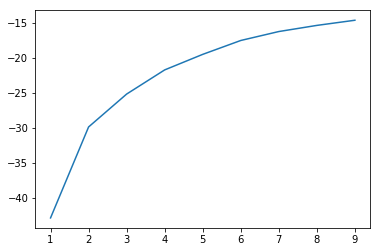

In [44]:
scores = cluster_scores(features.values)
plt.plot(np.arange(1, 10), scores);

Let's try 4 clusters:

In [45]:
n_clusters = 4

train = features.values

kmeans = KMeans(n_clusters=n_clusters)
labels = kmeans.fit_predict(train)
out = nba.with_column('label', labels)

In [50]:
out.group(['Pos', 'label'])

Pos,label,count
C,0,4
C,1,69
C,2,14
C,3,17
PF,0,30
PF,1,53
PF,2,25
PF,3,14
PF-C,2,1
PG,0,59


In [52]:
out.group(['Pos', 'label']).pivot('Pos', 'label', 'count', sum).show()

label,C,PF,PF-C,PG,SF,SG,SG-SF
0,4,30,0,59,40,63,0
1,69,53,0,1,3,1,0
2,14,25,1,49,47,40,1
3,17,14,0,20,15,12,0


In [53]:
out.group('label')

label,count
0,196
1,127
2,177
3,78


In [54]:
out.group('label', np.mean)

label,Rk mean,Player mean,Pos mean,Age mean,Tm mean,G mean,GS mean,MP mean,FG mean,FGA mean,3P mean,3PA mean,2P mean,2PA mean,FT mean,FTA mean,ORB mean,DRB mean,TRB mean,AST mean,STL mean,BLK mean,TOV mean,PF mean,PTS mean
0,235.056,,,26.6429,,53.1786,23.5561,1275.91,197.786,458.837,60.0612,168.056,137.724,290.781,84.8265,107.852,32.7653,142.5,175.265,123.602,41.5051,14.9745,70.2092,97.7551,540.459
1,251.74,,,26.6457,,49,21.8661,965.315,145.433,281.709,4.98425,16.9606,140.449,264.748,68.3543,107.307,89.4646,197.843,287.307,55.3465,28.0315,40.5669,52.5354,104.937,364.205
2,238.271,,,27.4689,,41.5706,12.6893,758.887,79.8079,191.802,27.9774,81.4294,51.8305,110.373,27.8475,37.5311,21.1582,83.7627,104.921,67.7062,25.4972,10.5932,35.6667,65.7006,215.441
3,247.436,,,26.1026,,56.5641,43.7821,1686.96,369.808,805.462,66.2564,184.397,303.551,621.064,204.654,251.782,70.8718,247.013,317.885,204.346,56.9615,36.2949,124.128,121.154,1010.53


Plot histograms/scatterplots for labels to assess the clusters

In [55]:
labels

array([1, 3, 1, 0, 1, 1, 3, 2, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3,
       3, 2, 2, 2, 0, 1, 0, 2, 0, 2, 0, 1, 0, 0, 3, 0, 0, 0, 1, 0, 2, 1,
       0, 3, 3, 0, 1, 2, 1, 2, 1, 1, 2, 3, 0, 1, 2, 0, 1, 3, 0, 1, 0, 0,
       2, 0, 0, 3, 2, 2, 2, 2, 0, 3, 0, 3, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 2, 0, 1, 3, 0, 3, 0, 0, 0, 2, 0, 2, 2, 2, 2, 3, 3, 0, 0, 0,
       0, 2, 2, 2, 2, 0, 3, 0, 3, 1, 2, 1, 2, 2, 2, 0, 3, 0, 1, 0, 0, 0,
       1, 2, 2, 1, 2, 3, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 1, 1, 0, 3, 1,
       0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 3, 2, 2, 0, 3, 2, 2, 3, 3, 3, 2, 3,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 2, 1, 2, 2, 0, 0, 1, 0, 0, 0, 3,
       2, 2, 2, 0, 0, 1, 0, 3, 2, 2, 1, 0, 0, 2, 0, 0, 0, 2, 1, 2, 2, 3,
       0, 1, 2, 2, 1, 1, 1, 1, 0, 1, 2, 0, 2, 2, 2, 3, 2, 2, 0, 2, 2, 2,
       1, 1, 0, 0, 1, 2, 2, 1, 0, 1, 1, 2, 1, 2, 0, 0, 1, 2, 2, 3, 0, 3,
       3, 3, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0,
       2, 1, 0, 0, 0, 2, 1, 0, 1, 0, 3, 2, 1, 1, 1,

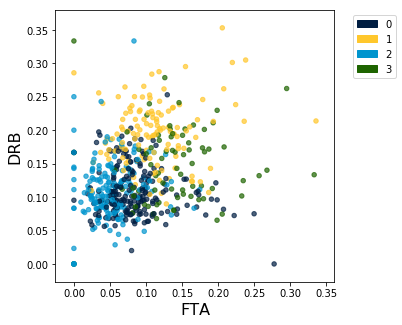

In [56]:
(
    features
    .with_column('label', labels)
    .where('FTA', are.below(0.4))  # filter out james harden
    .scatter('FTA', 'DRB', colors='label')
)

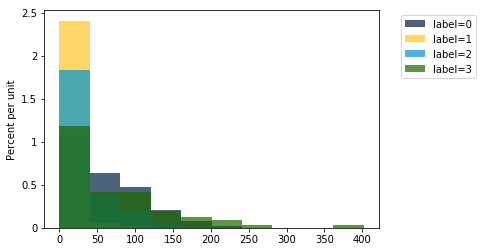

In [57]:
out.hist('3P', group='label')

Try normalizing

In [59]:
features.values

array([[0.13584475, 0.24429224, 0.0216895 , ..., 0.03082192, 0.11757991,
        0.35045662],
       [0.13333333, 0.4       , 0.        , ..., 0.13333333, 0.13333333,
        0.46666667],
       [0.12959285, 0.21151936, 0.        , ..., 0.04170804, 0.11072493,
        0.31578947],
       ...,
       [0.20565019, 0.40008309, 0.00290818, ..., 0.05650187, 0.0756128 ,
        0.45783133],
       [0.13021421, 0.24633596, 0.0005637 , ..., 0.03833145, 0.11499436,
        0.35963923],
       [0.1943662 , 0.4084507 , 0.        , ..., 0.06478873, 0.13661972,
        0.51267606]])

In [60]:
ss = StandardScaler()
ssfeatures = ss.fit_transform(features.values)
ssfeatures

array([[-0.14805292, -0.8462623 , -0.33672078, ..., -0.91621721,
         0.62662365, -0.24266024],
       [-0.19715983,  0.79164849, -1.03613183, ...,  2.89365805,
         1.03055697,  0.60408831],
       [-0.27029929, -1.19100453, -1.03613183, ..., -0.51163025,
         0.45085514, -0.49525765],
       ...,
       [ 1.2168862 ,  0.79252254, -0.94235297, ...,  0.03818784,
        -0.44945442,  0.53971081],
       [-0.25814963, -0.82476406, -1.01795453, ..., -0.63712247,
         0.56032772, -0.17575239],
       [ 0.99624495,  0.88054258, -1.03613183, ...,  0.34617221,
         1.11482311,  0.93932941]])

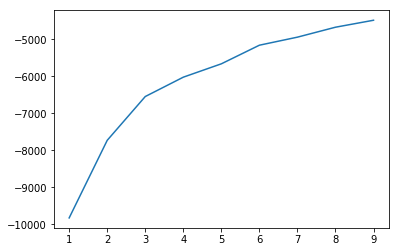

In [61]:
scores = cluster_scores(ssfeatures)
plt.plot(np.arange(1, 10), scores);

In [ ]:
n_clusters = 3

train = ssfeatures

kmeans = KMeans(n_clusters=n_clusters)
labels = kmeans.fit_predict(train)
out = nba.with_column('label', labels)

Getting better:
   * Centers are isolated to one cluster (along with most Power Forwards)
   * Small forwards and guards are split between the other two

In [ ]:
out.group(['Pos', 'label']).pivot('Pos', 'label', 'count', sum).show()

What differentiates the other two?
* Plot histograms and scatter-plots!
* Look at who the outliers are.
    - which players are assigned clusters that don't match their positions?
    - An example may be Lebron James has stats that look like both a Forward and a Guard.

In [ ]:
out.group('label', np.mean)

In [ ]:
# Code

In [ ]:
# Code

### Next steps:
* Remove extraneous columns
* Add columns for efficiency (e.g. FG/FGA)
* Add assist-turnover ratio (i.e. AST/TOV)
* Forget trying to capture positions:
    - Use only certain subsets and see what type of clusters you get!

In [ ]:
# Code

In [ ]:
# Code

# TSNE

Another clustering algorithm is called "t-distributed stochastic neighbor embedding", or TSNE for short. It attempts to embed high-dimensional datasets into low dimensions, while preserving regions of high-density.

See a nice explanation here: https://distill.pub/2016/misread-tsne/

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2) # embeds in the plane -- 2 dimensions
tsne_out = tsne.fit_transform(ssfeatures)

In [ ]:
(
    Table(['1', '2'])
    .with_rows(out)
    .with_columns('label', labels)
    .scatter('1', '2', colors='label')
)

In [ ]:
# Code

# Extra: clustering SDPD data

A cleaned version of the SDPD data is found at `data/sdpd_clean.csv`. Try clustering these and understanding the clusters.

As clustering algorithms require only numeric input, categorical data has been cleaned in a standard way. Yes/No fields have been changed to 1/0. 

The ethnicities are encoded with integers according to the following map:

```
 'W': 0,
 'H': 1,
 'B': 2,
 'O': 3,
 'A': 4,
 'F': 5,
 'V': 6,
 'C': 7,
 'I': 8,
 'X': 9,
 'K': 10,
 NAN: 11,
 'P': 12,
 'J': 13,
 'Z': 14,
 'L': 15,
 'D': 16,
 'S': 17,
 'G': 18,
 'U': 19
```

What are the implications of such a transformation of features? (hint: think about the distance function).

Have fun!

In [ ]:
# Code